<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/ml_tutor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to machine learning

Working examples are presented to introduce Machnine Learning tasks.


##Predicting wine quality from parameters

We use public white wine quality dataset. Let's download it!

In [21]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-12-19 14:48:14--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv.1’

winequality-white.c     [   <=>              ] 258.23K   423KB/s    in 0.6s    

2023-12-19 14:48:15 (423 KB/s) - ‘winequality-white.csv.1’ saved [264426]



There are eleven parameters and a quality column in the downloaded csv file. The first few lies are the following (the column headers are in the first line):

In [22]:
!head winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


We will use different methods to predict quality from these parameters.

###Multiple regression

Supposing there are linear connections between the parameters and the quality we fit a hyper-plane on the data set.

First we read data using **pandas**.

In [23]:
import pandas
df = pandas.read_csv("winequality-white.csv", sep=';')
print(f"Number of records in the data set: {len(df.index)}")
df.head()

Number of records in the data set: 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's sperate training and test data sets. 25% of records will be used for **testing** the model.

In [24]:
features = list(df.columns)[:-1]
X = df[features]
y = df[df.columns[-1]]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

The distribution of different quality values in the train and test set.

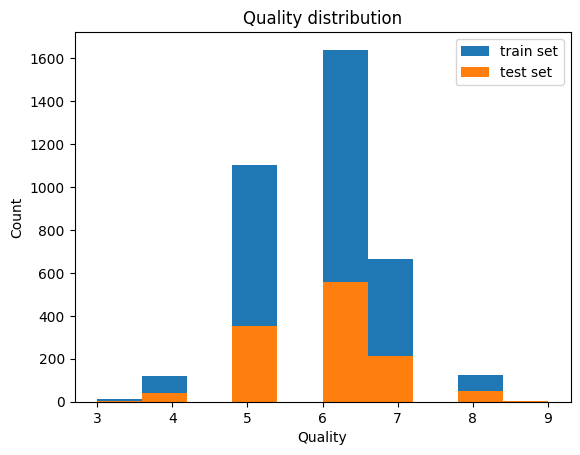

In [26]:
from matplotlib import pyplot as plt
plt.hist(y_train, label='train set')
plt.hist(y_test, label='test set')
plt.legend()
plt.xlabel('Quality')
plt.ylabel('Count')
_ = plt.title('Quality distribution')

0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2


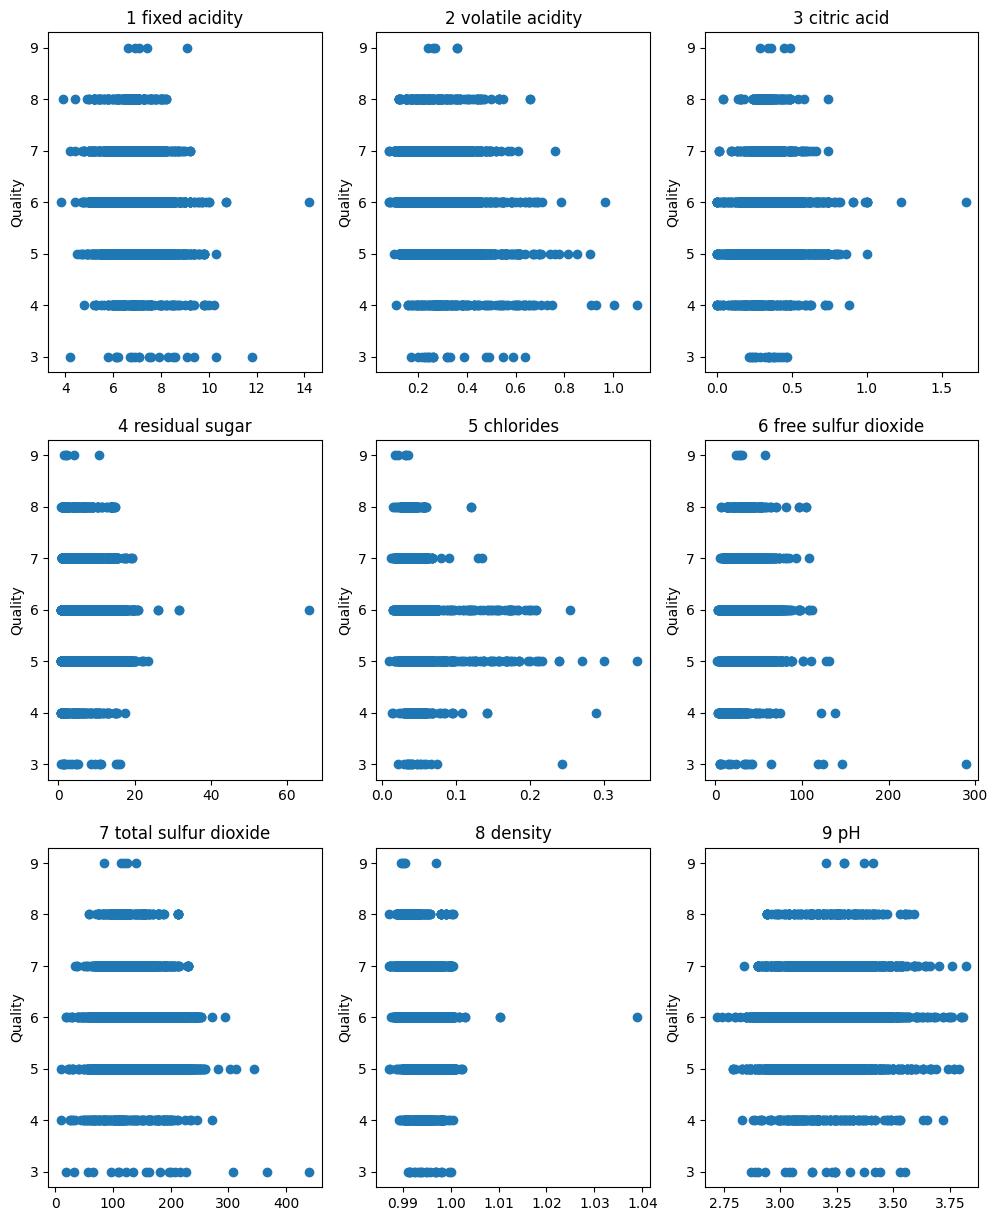

In [98]:
_, ax = plt.subplots(3, 3, figsize=(12, 15))
for n, col_name in enumerate(X.columns[0:9]):
    i, j = n // 3, n % 3
    print(n, i, j)
    ax[i, j].scatter(X[col_name], y)
    ax[i, j].set_title(str(n+1)+" "+col_name)
    ax[i, j].set_ylabel('Quality')

In [27]:
# creating the model
from sklearn import linear_model
regr = linear_model.LinearRegression()
_ = regr.fit(X_train, y_train)

Calculating some statistical data using the model on the test set. Let's display also the distribution of differences.

mean difference: 0.0; mean error: 0.8; min diff -3.0; max diff 5.0
52.3% fits


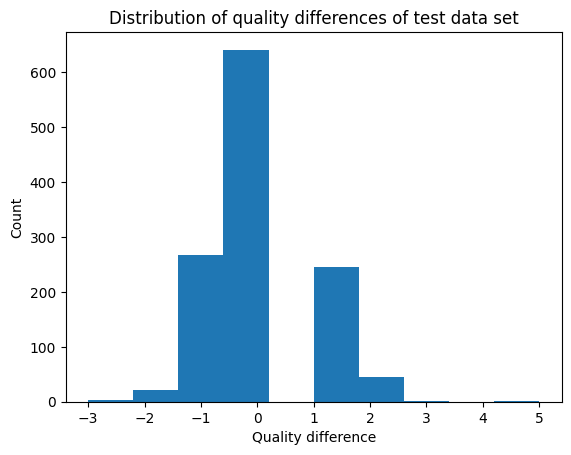

In [28]:
# testing the model
predicted = (regr.predict(X_test)+0.5).astype(int)
diff = y_test - predicted
print(f"mean difference: {diff.mean():.1f}; mean error: {diff.std():.1f}; min diff {diff.min():.1f}; max diff {diff.max():.1f}")
print(f"{diff[diff == 0].shape[0] / diff.shape[0] * 100:.1f}% fits")
plt.hist(diff)
plt.xlabel('Quality difference')
plt.ylabel('Count')
_ = plt.title('Distribution of quality differences of test data set')

In [29]:
from sklearn.metrics import accuracy_score
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = (regr.predict(X_train)+0.5).astype(int))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = predicted)*100:.1f}%")

Train data accuracy: 51.8%
Test  data accuracy: 52.3%


##Logistic regression

Lodistic regression is a classification algorithm.1

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logit = LogisticRegression(max_iter = 100000, C=10)
logit.fit(X_train, y_train)
print(f"Train data accuracy: {logit.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {logit.score(X_test, y_test)*100:.1f}%")

Train data accuracy: 54.2%
Test  data accuracy: 53.8%


In [32]:
log_pred = logit.predict(X_test)
diff = y_test - log_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

mean difference: 0.1 mean error: 0.8 min diff -3.0 max diff 3.0


In [33]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = logit.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = log_pred)*100:.1f}%")

Train data accuracy: 54.2%
Test  data accuracy: 53.8%


Confusion matrix

In [34]:
from sklearn import metrics
cm_test = metrics.confusion_matrix(y_test, log_pred)
print("Confusion matrix of test data set")
print(cm_test)
cm_train = metrics.confusion_matrix(y_train, logit.predict(X_train))
print("\nConfusion matrix of train data set")
print(cm_train)

Confusion matrix of test data set
[[  0   0   2   3   0   0   0]
 [  0   2  26  14   0   0   0]
 [  0   0 196 156   1   1   0]
 [  0   2 109 422  25   1   0]
 [  0   0  13 162  39   0   0]
 [  0   0   1  38  10   0   0]
 [  0   0   0   2   0   0   0]]

Confusion matrix of train data set
[[   2    0    6    7    0    0    0]
 [   0    5   68   46    2    0    0]
 [   0    3  609  484    7    0    0]
 [   1    0  316 1237   85    0    0]
 [   0    0   38  492  136    0    0]
 [   0    0    9   79   38    0    0]
 [   0    0    0    0    3    0    0]]


##Decision trees

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [37]:
tree_pred = dtree.predict(X_test)
diff = y_test - tree_pred
print(f"mean difference: {diff.mean():.1f} mean error: {diff.std():.1f} min diff {diff.min():.1f} max diff {diff.max():.1f}")

mean difference: -0.0 mean error: 0.8 min diff -3.0 max diff 5.0


In [38]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = tree_pred)*100:.1f}%")

Train data accuracy: 100.0%
Test  data accuracy: 61.6%


In [39]:
cm_test = metrics.confusion_matrix(y_test, tree_pred)
print("Confusion matrix of test data set")
print(cm_test)

Confusion matrix of test data set
[[  0   0   3   2   0   0   0]
 [  1  15  13   8   5   0   0]
 [  0  15 227  99  12   1   0]
 [  0  15 106 356  70  12   0]
 [  0   0   7  52 137  18   0]
 [  1   0   6  10  13  19   0]
 [  0   0   0   0   2   0   0]]


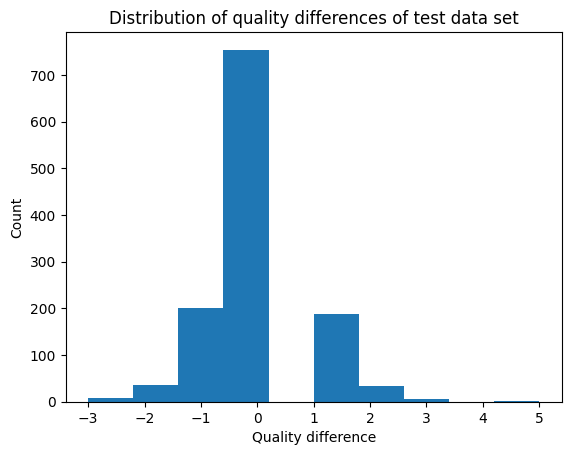

In [40]:
plt.hist(diff)
plt.xlabel('Quality difference')
plt.ylabel('Count')
_ = plt.title('Distribution of quality differences of test data set')

##Neural network

Number of neurons:

$N_h = \frac {N_s} {\alpha \cdot (N_i + N_o)}$

$N_s$ - number of input samples in train data set

$\alpha$ - scaling factor between 2 and 10

$N_i$ - number of input neurons

$N_o$ - number of output neurons

In [74]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-2, max_iter=10000,
                    hidden_layer_sizes=(40, 40), random_state=1)
_ = clf.fit(X_train, y_train)

In [56]:
print(f"Train data accuracy: {accuracy_score(y_true = y_train, y_pred = clf.predict(X_train))*100:.1f}%")
print(f"Test  data accuracy: {accuracy_score(y_true = y_test, y_pred = clf.predict(X_test))*100:.1f}%")

Train data accuracy: 58.0%
Test  data accuracy: 54.2%


Scaling the data

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),
                     MLPClassifier(solver='lbfgs', alpha=1e-2, max_iter=10000, hidden_layer_sizes=(40, 40), random_state=1))
pipe.fit(X_train, y_train)
print(f"Train data accuracy: {pipe.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {pipe.score(X_test, y_test)*100:.1f}%")

Train data accuracy: 100.0%
Test  data accuracy: 62.0%


In [76]:
cm_test = metrics.confusion_matrix(y_test, pipe.predict(X_test))
print("Confusion matrix of test data set")
print(cm_test)
cm_train = metrics.confusion_matrix(y_train, pipe.predict(X_train))
print("\nConfusion matrix of train data set")
print(cm_train)

Confusion matrix of test data set
[[  0   0   3   1   1   0   0]
 [  1  13  19   9   0   0   0]
 [  1  13 229  92  18   1   0]
 [  1  11 111 367  59  10   0]
 [  0   3  13  47 130  21   0]
 [  0   0   1  10  17  21   0]
 [  0   0   0   0   2   0   0]]

Confusion matrix of train data set
[[  15    0    0    0    0    0    0]
 [   0  121    0    0    0    0    0]
 [   0    0 1103    0    0    0    0]
 [   0    0    0 1639    0    0    0]
 [   0    0    0    0  666    0    0]
 [   0    0    0    0    0  126    0]
 [   0    0    0    0    0    0    3]]


In [77]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 100000, C=10))
pipe.fit(X_train, y_train)
print(f"Train data accuracy: {pipe.score(X_train, y_train)*100:.1f}%")
print(f"Test  data accuracy: {pipe.score(X_test, y_test)*100:.1f}%")

Train data accuracy: 54.2%
Test  data accuracy: 54.0%
